In [1]:
import gensim 

In [2]:
import pandas as pd

In [3]:
wiki_data = pd.read_csv('data/wikipedia/cleaned_wiki_data_full_text_chunks.csv')

In [4]:
len(wiki_data)

152895

In [5]:
wiki_data = wiki_data[wiki_data.text.apply(lambda x: len(x) > 500)]

In [6]:
import langdetect

In [7]:
langdetect.detect(wiki_data.text[1]) == 'en'

True

In [8]:
is_enlish = wiki_data.text.apply(lambda x: langdetect.detect(x) == 'en')

In [9]:
wiki_data = wiki_data[is_enlish]

In [10]:
def read_corpus(list_of_docs, tokens_only=False):
    for i, line in enumerate(list_of_docs):
        if tokens_only:
            yield gensim.utils.simple_preprocess(line)
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [i])

In [11]:
removed_duplicates = wiki_data.text.drop_duplicates()

In [12]:
len(removed_duplicates)

67667

In [13]:
train_corpus = list(read_corpus(removed_duplicates))
test_corpus = list(read_corpus(removed_duplicates, tokens_only=True))

In [29]:
for vector_size in [300]:
    model = gensim.models.doc2vec.Doc2Vec(vector_size=vector_size, min_count=10, epochs=50, workers=4)
    print(vector_size)
    model.build_vocab(train_corpus)
    model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
    print(vector_size, 'done')
    model.save('models/simple_wiki_chunked_word_limited_doc2vec_' + str(vector_size) + '_vector_10_min_word_epoch_' + str(50))

300
300 done


In [30]:
epochs = 50

while epochs < 1000:
    epochs += 50
    model.train(train_corpus, total_examples=model.corpus_count, epochs=50)
    model.save('models/simple_wiki_chunked_word_limited_english_doc2vec_' + str(vector_size) + '_vector_10_min_word_epoch_' + str(epochs))
    print(epochs)

100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


# Looking at the consistency of these things

In [9]:
topics = ['The domestic cat is a small, typically furry, carnivorous mammal. They are often called house cats[5] when kept as indoor pets or simply cats when there is no need to distinguish them from other felids and felines. They are often valued by humans for companionship and for their ability to hunt vermin. There are more than seventy cat breeds recognized by various cat registries.',
          "Association football, more commonly known as football or soccer,[a] is a team sport played between two teams of eleven players with a spherical ball. It is played by 250 million players in over 200 countries and dependencies, making it the world's most popular sport.[5][6][7][8] The game is played on a rectangular field with a goal at each end. The object of the game is to score by moving the ball beyond the goal line into the opposing goal.",
         "Amazon.com Inc said on Tuesday it would raise its minimum wage to $15 per hour for U.S. employees from next month, giving ground to critics of poor pay and working conditions at the world’s second most valuable company.",
         " France said on Tuesday there was no doubt Iran’s intelligence ministry was behind a June plot to attack an exiled opposition group’s rally outside Paris and it seized assets belonging to Tehran’s intelligence services and two Iranian nationals."]

In [10]:
from gensim.utils import simple_preprocess

In [11]:
epochs = 1000
vector_size = 300

model = gensim.models.Doc2Vec.load('models/simple_wiki_chunked_word_limited_english_doc2vec_' + str(vector_size) + '_vector_10_min_word_epoch_' + str(epochs))


In [13]:
vector = model.infer_vector(simple_preprocess(topics[0]), epochs=1000)
model.docvecs.most_similar([vector])

/home/wmvoje/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(1003, 0.34445491433143616),
 (43430, 0.3391963541507721),
 (28072, 0.33067113161087036),
 (64547, 0.32810425758361816),
 (24836, 0.3272174000740051),
 (33116, 0.32587265968322754),
 (8916, 0.32214438915252686),
 (57545, 0.32103708386421204),
 (8917, 0.32016515731811523),
 (41391, 0.31908485293388367)]

In [16]:
test_corpus[28072]

['the',
 'town',
 'grew',
 'from',
 'farm',
 'owned',
 'by',
 'ex',
 'convict',
 'hotel',
 'inn',
 'keeper',
 'timothy',
 'beard',
 'it',
 'was',
 'on',
 'the',
 'banks',
 'of',
 'the',
 'molonglo',
 'river',
 'the',
 'original',
 'name',
 'was',
 'quinbean',
 'which',
 'means',
 'clear',
 'waters',
 'queanbeyan',
 'became',
 'township',
 'in',
 'there',
 'were',
 'about',
 'people',
 'living',
 'there',
 'some',
 'of',
 'the',
 'important',
 'historic',
 'buildings',
 'still',
 'standing',
 'were',
 'built',
 'in',
 'the',
 'early',
 'days',
 'traces',
 'of',
 'gold',
 'were',
 'found',
 'in',
 'there',
 'were',
 'also',
 'some',
 'lead',
 'and',
 'silver',
 'mines',
 'settlers',
 'were',
 'often',
 'wikt',
 'rob',
 'robbed',
 'by',
 'bushranger',
 'including',
 'john',
 'tennant',
 'jacky',
 'jacky',
 'frank',
 'gardiner',
 'and',
 'ben',
 'hall',
 'in',
 'the',
 'government',
 'built',
 'post',
 'office',
 'at',
 'queanbeyan',
 'the',
 'sydney',
 'gazette',
 'and',
 'new',
 'south',

In [51]:
'models/simple_wiki_chunked_word_limited_english_doc2vec_' + str(vector_size) + '_vector_10_min_word_epoch_' + str(epochs)

'models/simple_wiki_chunked_word_limited_english_doc2vec_300_vector_10_min_word_epoch_1000'

In [3]:
import pickle as p

# with open('models/simple_wiki_chunked_corpus_english_only_10_count_cutoff.p', 'wb') as topick:
#     p.dump(test_corpus, topick)

with open('models/simple_wiki_chunked_corpus_english_only_10_count_cutoff.p', 'rb') as unpick:
    test_corpus = p.load(unpick)

# Testing number of epochs to use when inferring vector

In [240]:
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
%matplotlib inline

In [248]:
import pandas as pd

In [287]:
cosine_data_frame = pd.DataFrame(columns=['vector_size', 'document', 'epochs', 'cosine'])

In [294]:
vector_sizes = [50, 100, 150, 200, 250]
vector_sizes.extend([25, 75, 125, 175, 225])

dataframe_index = 0
for vector_size in vector_sizes:
    
    model = gensim.models.Doc2Vec.load('models/simple_wiki_chunked_doc2vec_'+str(vector_size)+'_vector_10_min_word')
    for epochs in [200]:
        for topic_index, topic in enumerate([topics[0]]):
            list_of_arrays = []
            for i in range(10):
                list_of_arrays.append(model.infer_vector(simple_preprocess(topic), epochs=epochs))
            for vec1, vec2 in combinations(list_of_arrays, 2):
#                 cosine_numbers.append(cosine_similarity([vec1], [vec2]))
                cosine_data_frame.loc[dataframe_index] = [vector_size, topic_index, epochs, cosine_similarity([vec1], [vec2])]
                dataframe_index += 1

In [295]:
cosine_data_frame.cosine = cosine_data_frame.cosine.apply(lambda x: float(x))

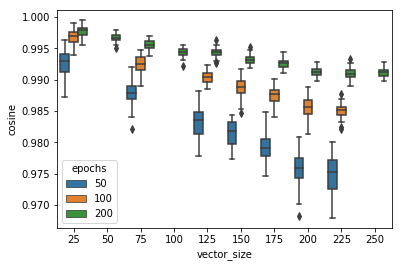

In [296]:
sns.boxplot(x='vector_size', hue='epochs', y='cosine', data=cosine_data_frame)

# Investigating model training

In [3]:
import gensim

In [302]:
model.workers = 4

In [303]:
model.workers

4

In [304]:
model.total_train_time

2444.668396513989

In [307]:
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=9)

CPU times: user 23min 44s, sys: 40.5 s, total: 24min 24s
Wall time: 9min 19s


In [308]:
model.total_train_time

3058.171780727018

In [309]:
model.save('models/simple_wiki_chunked_doc2vec_300_vector_10_min_word_50epochs')

In [310]:
model.vector_size

300

In [311]:
epochs = 50 

while epochs < 100:
    epochs += 1
    model.train(train_corpus, total_examples=model.corpus_count, epochs=1)
    model.save('models/simple_wiki_chunked_doc2vec_300_vector_10_min_word_'+str(epochs) + 'epochs')
    print(epochs)

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


# looking at how vectors change with epochs

In [32]:
import gensim
import pandas as pd

In [28]:
list_of_documents_to_test = list(range(10))

from collections import defaultdict

dict_of_arrays = defaultdict(list)

for epoch in list(range(50, 101, 3)):
    filname = 'models/simple_wiki_chunked_doc2vec_300_vector_10_min_word_'+str(epoch) + 'epochs'
    model = gensim.models.Doc2Vec.load(filname)
    for doc in list_of_documents_to_test:
        dict_of_arrays[doc].append(model.docvecs[doc])
    


In [41]:
test = pd.DataFrame(columns=['epoch', 'cosine'])

array_index = 0
for epoch, i in zip(list(range(50, 101, 3)), dict_of_arrays[9]):
    print(cosine_similarity([dict_of_arrays[9][0]], [i]))
    test.loc[array_index] = [epoch, float(cosine_similarity([dict_of_arrays[9][0]], [i]))]
    array_index += 1

[[1.]]
[[0.9952266]]
[[0.9891814]]
[[0.98475707]]
[[0.9832585]]
[[0.9789617]]
[[0.97666264]]
[[0.972366]]
[[0.968732]]
[[0.96397537]]
[[0.96265674]]
[[0.95888954]]
[[0.9557454]]
[[0.9526125]]
[[0.9497739]]
[[0.9478444]]
[[0.9438855]]


In [42]:
test

,epoch,cosine
0,50.0,1.000000
1,53.0,0.995227
2,56.0,0.989181
3,59.0,0.984757
4,62.0,0.983258
5,65.0,0.978962
6,68.0,0.976663
7,71.0,0.972366
8,74.0,0.968732
9,77.0,0.963975


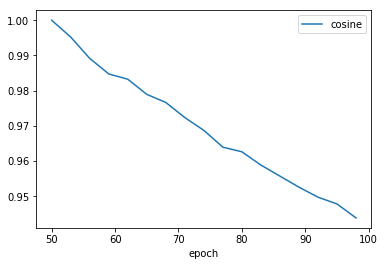

In [43]:
test.plot(x='epoch', y='cosine')

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
document_item = 14

list_to_print = []
for item1, item2 in list(zip(dict_of_arrays[document_item],dict_of_arrays[document_item][1:])):
    print(cosine_similarity([item1], [item2]))
    list_to_print.append(float(cosine_similarity([item1], [item2])))

[[0.990417]]
[[0.9903075]]
[[0.99180174]]
[[0.9945694]]
[[0.99360144]]
[[0.9950986]]
[[0.9943913]]
[[0.9958112]]
[[0.99636346]]
[[0.99647355]]


In [23]:
import seaborn as sns
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt

In [ ]:
plt

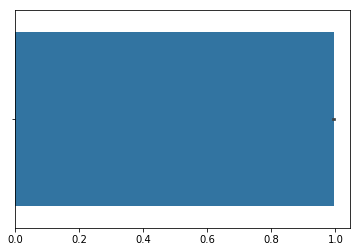

In [25]:
sns.barplot(list_to_print)

In [2]:
import numpy as np

In [16]:
epochs_list = ['']
epochs_list = []
epochs_list.extend(list(range(50, 101)))
epochs_list.extend(list(range(100, 851, 50)))

list_of_documents_to_test = list(range(10))

from collections import defaultdict

# dict_of_arrays = defaultdict(list)
output = None


for epoch in epochs_list:
    filname = 'models/simple_wiki_chunked_doc2vec_300_vector_10_min_word_'+str(epoch) + 'epochs'
    model = gensim.models.Doc2Vec.load(filname)
    for doc in [10]:
        if output is not None:
            try:
                output = np.append([output], [model.docvecs[doc]], axis=0)
            except:
                output = np.append(output, [model.docvecs[doc]], axis=0)
        else:
            output = np.array(model.docvecs[doc])
#         output.append(model.docvecs[doc])
    del model

In [20]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
test = pd.DataFrame(columns=['epoch', 'cosine'])

array_index = 0
for epoch, i in zip(epochs_list, output):
    print(cosine_similarity([output[0]], [i]))
    test.loc[array_index] = [epoch, float(cosine_similarity([output[0]], [i]))]
    array_index += 1

[[0.9999999]]
[[0.99800295]]
[[0.9966716]]
[[0.9948083]]
[[0.9946049]]
[[0.99237365]]
[[0.9893937]]
[[0.9899368]]
[[0.9886581]]
[[0.98773706]]
[[0.9865179]]
[[0.986983]]
[[0.9855287]]
[[0.9843553]]
[[0.9835083]]
[[0.98159224]]
[[0.98158085]]
[[0.9806148]]
[[0.9795971]]
[[0.9774846]]
[[0.97732246]]
[[0.9756546]]
[[0.97369456]]
[[0.9734365]]
[[0.97264814]]
[[0.9714664]]
[[0.97075444]]
[[0.9707972]]
[[0.9693209]]
[[0.9675426]]
[[0.9674686]]
[[0.9665442]]
[[0.9641351]]
[[0.9617697]]
[[0.9599803]]
[[0.9575818]]
[[0.9578228]]
[[0.95575124]]
[[0.9545353]]
[[0.9558728]]
[[0.9559883]]
[[0.9536794]]
[[0.9540061]]
[[0.9519363]]
[[0.9518798]]
[[0.95321715]]
[[0.9503181]]
[[0.9499104]]
[[0.951043]]
[[0.9501809]]
[[0.95146835]]
[[0.95146835]]
[[0.9365027]]
[[0.9299035]]
[[0.92287934]]
[[0.91481274]]
[[0.89977175]]
[[0.89308167]]
[[0.8877939]]
[[0.87942684]]
[[0.8758034]]
[[0.86993694]]
[[0.86232036]]
[[0.85841787]]
[[0.8497493]]
[[0.84622085]]
[[0.8421024]]


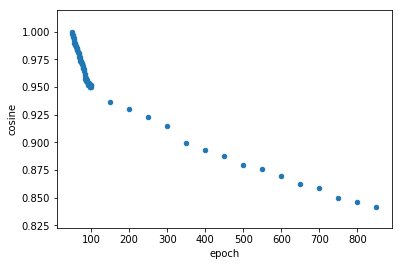

In [30]:
%matplotlib inline
import seaborn as sns
test.plot.scatter(x='epoch', y='cosine')

[array([-0.09873271, -0.38445738, -0.11841913,  0.15415132, -0.6523824 ,
         0.11224592, -0.35974038, -0.24351221, -0.94710666, -0.22751893,
         0.10789845, -0.698158  ,  0.6245654 ,  0.00511736,  0.9365074 ,
         0.5034717 ,  1.1449183 ,  0.0580245 ,  0.6188839 , -0.3746723 ,
        -0.59429264, -0.4119914 , -0.7838709 ,  0.12741818,  0.743559  ,
        -0.2930218 , -0.254785  ,  0.20689121,  0.06806126, -1.2452523 ,
        -0.14102378, -0.01871628,  0.12427453,  0.8795282 ,  0.4701037 ,
         0.00315543,  0.18903306, -0.57624084,  0.05506678, -0.14503291,
         0.10938947,  0.41105354,  0.5317753 , -0.06573683, -0.6465584 ,
         0.84541434,  0.6550027 ,  0.08956805, -0.09003133, -0.2111553 ,
         0.04252867, -0.7158433 ,  0.13249995,  0.7015682 , -0.5330992 ,
         0.65194   , -0.10077243, -0.35465536,  0.00540563,  0.10988909,
        -0.22945848,  0.14482212, -0.1740423 , -0.1290046 , -1.3902265 ,
        -0.3759748 ,  1.7233386 , -0.00926691, -0.1